# Nama : William Cahyadi
# NIM    : 2201730135

In [2]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('dataset.csv')

In [3]:
data.columns

Index(['id', 'host_id', 'host_name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating', 'reviews_per_month',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 5

In [4]:
# hilangkan column yang tidak memiliki nama
data.drop(data.columns[30:91],axis=1,inplace = True)

In [5]:
data

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,NaN,NaN,NaN,Shibuya District,3,3,Shibuya District,...,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,NaN,NaN,NaN,NaN,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,NaN,NaN
13045,43260684,191971770,Hostel,NaN,NaN,NaN,NaN,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,NaN,NaN
13046,43272924,335257890,Blue,within an hour,100%,100%,NaN,0,0,Shinjuku District,...,28,30,28,28,1125,1125,0,0,NaN,NaN
13047,43281694,333948576,Kido,NaN,NaN,NaN,NaN,0,0,Shibuya District,...,1,90,1,1,90,90,0,0,NaN,NaN


In [6]:
# lihat jumlah data yang kosong
data.isnull().sum()

id                              0
host_id                       238
host_name                      46
host_response_time            850
host_response_rate            803
host_acceptance_rate          320
host_neighbourhood           1815
host_listings_count            53
host_total_listings_count      21
neighbourhood                1188
neighbourhood_cleansed         30
property_type                   1
room_type                       4
accommodates                    3
bathrooms                       5
bedrooms                       21
beds                           34
price                         202
guests_included                52
extra_people                   22
minimum_nights                 29
maximum_nights                 29
minimum_minimum_nights         33
maximum_minimum_nights          9
minimum_maximum_nights         24
maximum_maximum_nights         23
number_of_reviews               0
number_of_reviews_ltm           0
review_scores_rating         1974
reviews_per_mo

In [7]:
# drop row yang memiliki null - value (NaN)
data.dropna(inplace = True)
data = data.reset_index(drop = True)
data.count()

id                           8577
host_id                      8577
host_name                    8577
host_response_time           8577
host_response_rate           8577
host_acceptance_rate         8577
host_neighbourhood           8577
host_listings_count          8577
host_total_listings_count    8577
neighbourhood                8577
neighbourhood_cleansed       8577
property_type                8577
room_type                    8577
accommodates                 8577
bathrooms                    8577
bedrooms                     8577
beds                         8577
price                        8577
guests_included              8577
extra_people                 8577
minimum_nights               8577
maximum_nights               8577
minimum_minimum_nights       8577
maximum_minimum_nights       8577
minimum_maximum_nights       8577
maximum_maximum_nights       8577
number_of_reviews            8577
number_of_reviews_ltm        8577
review_scores_rating         8577
reviews_per_mo

In [8]:
columns = data.columns.tolist()

In [9]:
columns

['id',
 'host_id',
 'host_name',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'reviews_per_month']

In [10]:
features = [
 'host_response_time',
 'host_response_rate',
 'neighbourhood',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews'
]

In [11]:
data['host_response_time'].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'a few days or more', 'Sumida, Tokyo, Japan', 'Tokyo, Japan',
       'Shinjuku, Tokyo, Japan', 'Nakano, Tokyo, Japan',
       'Chuo City, Tokyo, Japan', 'Zhengzhou, Henan, China', 'JP',
       'tokyo', 'Shibuya, Tokyo, Japan', 'Tokyo, Tokyo, Japan', 'Japan'],
      dtype=object)

In [12]:
data['price'].unique()

array(['$11,048.00', '$4,171.00', '$6,952.00', '$3,957.00', '$8,045.00',
       '$5,149.00', '$3,530.00', '$10,726.00', '$31,980.00', '$5,990.00',
       '$13,049.00', '$28,023.00', '$25,028.00', '$3,209.00', '$2,145.00',
       '$13,477.00', '$6,007.00', '$3,969.00', '$3,325.00', '$3,637.00',
       '$12,871.00', '$12,979.00', '$8,581.00', '$3,316.00', '$14,974.00',
       '$69,522.00', '$80,004.00', '$10,910.00', '$16,471.00',
       '$26,953.00', '$2,460.00', '$9,439.00', '$5,470.00', '$18,985.00',
       '$25,991.00', '$2,467.00', '$10,512.00', '$5,455.00', '$5,134.00',
       '$8,022.00', '$6,845.00', '$31,018.00', '$5,348.00', '$7,701.00',
       '$13,193.00', '$8,450.00', '$10,404.00', '$11,979.00',
       '$17,006.00', '$15,017.00', '$3,850.00', '$9,519.00', '$16,044.00',
       '$9,947.00', '$49,984.00', '$7,508.00', '$5,776.00', '$4,385.00',
       '$6,543.00', '$4,505.00', '$25,743.00', '$4,827.00', '$10,190.00',
       '$3,218.00', '$3,861.00', '$34,868.00', '$33,680.00', '

In [13]:
data['review_scores_rating'].unique()

array(['95', '96', '90', '99', '91', '98', '94', '93', '97', '100', '88',
       '87', '92', '86', '89', '85', '75', '73', '82', '84', '81', '83',
       '76', '77', '80', '2016-12-08', '2016-12-17', '2016-12-09', '74',
       '70', '60', '68', '67', '79', '53', '78', '2018-06-30',
       '2018-04-02', '2019-04-25', '64', '2019-11-23', '2018-01-01', '72',
       '2018-07-10', '2018-07-03', '2018-07-06', '2018-07-17', '65', '71',
       '2018-09-09', '2018-09-10', '66', '2018-11-08', '69', '2019-01-13',
       '50', '2019-01-02', '2019-02-15', '20', '2019-04-02', '63', '62',
       '40', '2019-06-29', '57', '2019-10-06', '30', '2019-10-13', '55',
       '2019-12-29', '2020-03-09', '2020-02-03', '2020-03-29'],
      dtype=object)

# Clean Target Data (price and review_scores_rating data)

Bersihkan data price karena dalam data price terdapat data dalam format JSON.

In [14]:
# price
price_pattern = "^[$]"
for i,x in enumerate(data['price']):
    match = re.search(price_pattern,x)
    data.at[i,'price'] = x.replace('$','').replace(',','')
    if (not match):
        data.drop(i, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data['price'] = data['price'].astype(float)

In [15]:
data['price'].unique()

array([ 11048.,   4171.,   6952.,   3957.,   8045.,   5149.,   3530.,
        10726.,  31980.,   5990.,  13049.,  28023.,  25028.,   3209.,
         2145.,  13477.,   6007.,   3969.,   3325.,   3637.,  12871.,
        12979.,   8581.,   3316.,  14974.,  69522.,  80004.,  10910.,
        16471.,  26953.,   2460.,   9439.,   5470.,  18985.,  25991.,
         2467.,  10512.,   5455.,   5134.,   8022.,   6845.,  31018.,
         5348.,   7701.,  13193.,   8450.,  10404.,  11979.,  17006.,
        15017.,   3850.,   9519.,  16044.,   9947.,  49984.,   7508.,
         5776.,   4385.,   6543.,   4505.,  25743.,   4827.,  10190.,
         3218.,   3861.,  34868.,  33680.,   9626.,   9975.,   6524.,
         9010.,  15982.,  16196.,   2353.,   4813.,   6972.,   2896.,
        20001.,   5241.,   5041.,   2032.,  14011.,  16518.,   2994.,
        24992.,   9546.,   7723.,  17969.,  23958.,  30033.,   6865.,
        34967.,   4064.,   6757.,   1497.,  10619.,  31964.,  16947.,
         7487.,   50

Bersihkan data review_scores_rating karena ada data tanggal pada data tersebut

In [16]:
review_scores_rating_pattern = "^[0-9]{1,3}$"
for i,x in enumerate(data['review_scores_rating']):
    match = re.search(review_scores_rating_pattern,x)
    if (not match):
        data.drop(i, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data['review_scores_rating'] = data['review_scores_rating'].astype(int)

In [17]:
data['review_scores_rating'].unique()

array([ 95,  96,  90,  99,  91,  98,  94,  93,  97, 100,  88,  87,  92,
        86,  89,  85,  75,  73,  82,  84,  81,  83,  76,  77,  80,  74,
        70,  60,  68,  67,  79,  53,  78,  64,  72,  65,  71,  66,  69,
        50,  20,  63,  62,  40,  57,  30,  55])

# Data Cleaning (Data Independen)

In [18]:
numerical = ['host_response_rate','accommodates','bathrooms','bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [19]:
categorical = [ 'host_response_time', 'neighbourhood',
 'property_type']

## Categorical data

In [20]:
from sklearn import preprocessing

### 1. host_response_time

In [21]:
data['host_response_time'].unique().tolist()

['within a few hours', 'within a day', 'within an hour', 'a few days or more']

Kita perlu mengencode label-label tersebut menjadi angka

In [22]:
le = preprocessing.LabelEncoder()

data[['host_response_time']] = le.fit_transform(data['host_response_time'])

In [23]:
data

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,197677,964081,Yoshimi & Marek,2,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
1,289597,341577,Hide&Kei,2,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
2,370759,1573631,"Gilles,Mayumi,Taiki",1,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
3,700253,341577,Hide&Kei,2,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
4,872235,1573631,"Gilles,Mayumi,Taiki",1,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,44,3,96,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,43086662,143096922,Ming,3,100%,100%,Suginami District,16,16,Asakusa/Ueno,...,2,1125,2,5,1125,1125,1,1,100,1
8546,43105865,143096922,Ming,3,100%,100%,Suginami District,16,16,Asakusa/Ueno,...,2,1125,2,5,1125,1125,2,2,100,2
8547,43115560,143096922,Ming,3,100%,100%,Suginami District,16,16,Taito District,...,2,1125,2,5,1125,1125,1,1,100,1
8548,43142986,143096922,Ming,3,100%,100%,Suginami District,16,16,Shinjuku District,...,1,1125,1,5,1125,1125,1,1,100,1


### 2. neighbourhood

In [24]:
data['neighbourhood'].unique()

array(['Sumida District', 'Nerima District', 'Setagaya District',
       'Shinjuku District', 'Shimokitazawa', 'Adachi District',
       'Shibuya District', 'Katsushika District', 'Meguro District',
       'Toshima District', 'Minato District', 'Suginami District',
       'Bunkyo District', 'Taito District', 'Itabashi District',
       'Asakusa/Ueno', 'Edogawa District', 'Arakawa District',
       'Kita District', 'Nakano District', 'Akasaka', 'Nakameguro',
       'Shibuya', 'Chiyoda District', 'Chūō District', 'Shinjuku',
       'Ikebukuro', 'Aoyama', 'Tsukishima', 'Tsukiji', 'Ebisu/Daikanyama',
       'Roppongi', 'Ginza', 'Harajuku', 'Akihabara', 'Roppongi Hills'],
      dtype=object)

In [25]:
le = preprocessing.LabelEncoder()
data['neighbourhood'] = le.fit_transform(data['neighbourhood'])

Kita perlu mengencode label-label tersebut menjadi angka

In [26]:
data['neighbourhood'].unique()

array([31, 21, 24, 29, 27,  0, 26, 15, 17, 33, 18, 30,  6, 32, 14,  5, 10,
        4, 16, 20,  1, 19, 25,  7,  8, 28, 13,  3, 35, 34,  9, 22, 11, 12,
        2, 23])

### 3. property_type

In [27]:
data['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Hut', 'Tiny house',
       'Townhouse', 'Aparthotel', 'Loft', 'Hostel', 'Guesthouse',
       'Guest suite', 'Cabin', 'Serviced apartment', 'Villa',
       'Boutique hotel', 'Ryokan (Japan)', 'Hotel', 'Dorm', 'Camper/RV',
       'Bungalow', 'Bed and breakfast', 'Dome house', 'Tent', 'Cottage'],
      dtype=object)

In [28]:
le = preprocessing.LabelEncoder()
data['property_type'] = le.fit_transform(data['property_type'])

In [29]:
data['property_type'].unique()

array([ 1, 15,  7, 16, 21, 22,  0, 17, 13, 12, 11,  5, 19, 23,  3, 18, 14,
       10,  6,  4,  2,  9, 20,  8])

## Numerical data

Bersihkan data yang seharusnya numerikal dengan cara menghilangkan simbol-simbol seperti '$', ',' , '%'

In [30]:
for x in numerical:
    for i,j in enumerate(data[x]):
        data.at[i,x] = j.replace('$','').replace(',','').replace('%','')

In [31]:
for x in numerical:
    if x=='extra_people' or x=='bathrooms':
        data[x] = data[x].astype(float)
    else:
        data[x] = data[x].astype(int)

In [32]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_response_time  8550 non-null   int32  
 1   host_response_rate  8550 non-null   int32  
 2   neighbourhood       8550 non-null   int32  
 3   property_type       8550 non-null   int32  
 4   accommodates        8550 non-null   int32  
 5   bathrooms           8550 non-null   float64
 6   bedrooms            8550 non-null   int32  
 7   beds                8550 non-null   int32  
 8   extra_people        8550 non-null   float64
 9   minimum_nights      8550 non-null   int32  
 10  maximum_nights      8550 non-null   int32  
 11  number_of_reviews   8550 non-null   int32  
dtypes: float64(2), int32(10)
memory usage: 467.7 KB


In [33]:
price = data['price']
review_scores_rating = data['review_scores_rating']

In [34]:
for x in columns:
    if x in numerical or x in categorical:
        continue
    else:
        data.drop(x, axis=1,inplace=True)

In [35]:
columns = data.columns

In [36]:
columns

Index(['host_response_time', 'host_response_rate', 'neighbourhood',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews'],
      dtype='object')

In [37]:
data.insert(len(columns),'price',price)

In [38]:
columns = data.columns
data.insert(len(columns),'review_scores_rating',review_scores_rating)

In [39]:
columns = data.columns

In [40]:
data

,host_response_time,host_response_rate,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,number_of_reviews,price,review_scores_rating
0,2,100,31,1,2,1.0,1,2,0.0,3,365,165,11048.0,95
1,2,100,21,1,2,1.0,1,1,1070.0,28,180,113,4171.0,95
2,1,100,24,1,2,1.0,0,1,0.0,28,720,103,6952.0,95
3,2,100,21,1,2,1.0,1,1,1070.0,28,180,103,3957.0,96
4,1,100,24,15,3,1.0,2,2,550.0,28,720,44,8045.0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,3,100,5,1,9,1.5,3,5,1000.0,2,1125,1,24026.0,100
8546,3,100,5,1,7,1.5,3,4,1000.0,2,1125,2,19951.0,100
8547,3,100,32,1,7,1.5,2,4,1000.0,2,1125,1,19951.0,100
8548,3,100,29,1,6,1.5,2,3,1000.0,1,1125,1,12013.0,100


# 2. Predict price with logistic regression

## Feature Engineering

Price akan kita map menjadi tiga class yaitu murah, sedang, dan mahal. kita akan map menjadi 0 dan 1. Dimana nilai 0 berarti harga tersebut dibawah nilai tengah dan 1 berarti harga tersebut diatas nilai tengah

In [41]:
data_for_price = data.drop('review_scores_rating',axis = 1)

In [42]:
data_for_price

,host_response_time,host_response_rate,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,number_of_reviews,price
0,2,100,31,1,2,1.0,1,2,0.0,3,365,165,11048.0
1,2,100,21,1,2,1.0,1,1,1070.0,28,180,113,4171.0
2,1,100,24,1,2,1.0,0,1,0.0,28,720,103,6952.0
3,2,100,21,1,2,1.0,1,1,1070.0,28,180,103,3957.0
4,1,100,24,15,3,1.0,2,2,550.0,28,720,44,8045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,3,100,5,1,9,1.5,3,5,1000.0,2,1125,1,24026.0
8546,3,100,5,1,7,1.5,3,4,1000.0,2,1125,2,19951.0
8547,3,100,32,1,7,1.5,2,4,1000.0,2,1125,1,19951.0
8548,3,100,29,1,6,1.5,2,3,1000.0,1,1125,1,12013.0


In [43]:
data_for_price['price'].describe()

count      8550.000000
mean      26142.720702
std       77341.627921
min           0.000000
25%        6972.000000
50%       11979.000000
75%       20001.000000
max      999995.000000
Name: price, dtype: float64

range : 

class 0 : 0 - 11979, class 1 : > 11978 

In [44]:
for i,x in enumerate(data_for_price['price']):
    if(x>=0 and x<=11979):
        data_for_price.at[i,'price'] = 0
    else:
        data_for_price.at[i,'price'] = 1
        
data_for_price['price'] = data_for_price['price'].astype(int)

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

count_category = pd.value_counts(data_for_price['price'],sort = True)
print(count_category)

0    4349
1    4201
Name: price, dtype: int64


In [46]:
data_for_price[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   8550 non-null   int32
dtypes: int32(1)
memory usage: 33.5 KB


data tidak terlalu imbalance sehingga kita tidak perlu melakukan oversampling ataupun undersampling

# Scale data

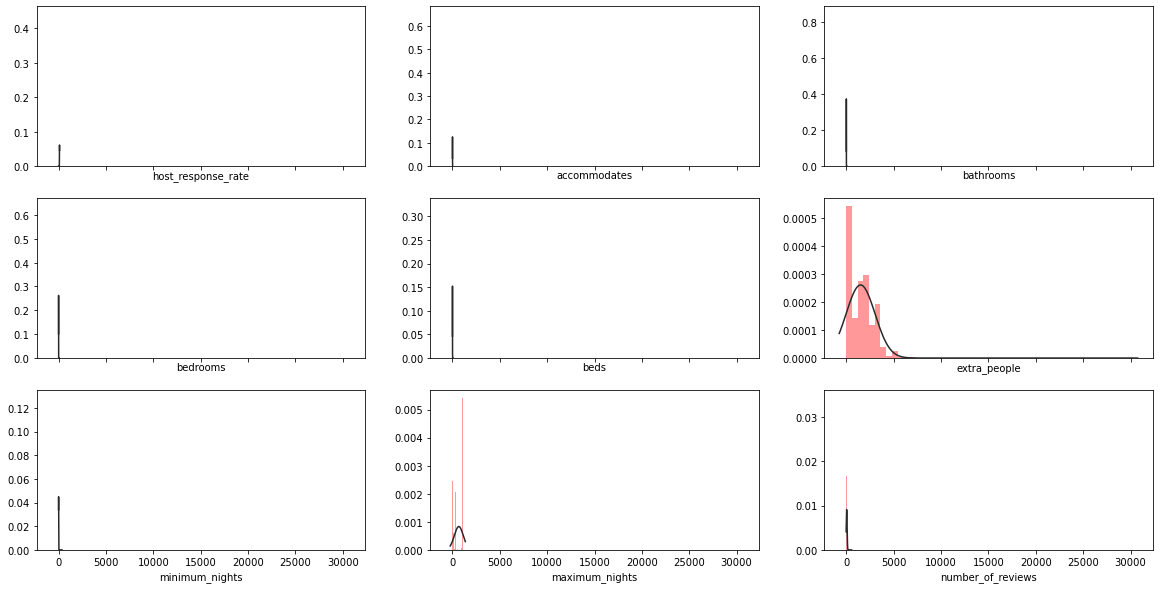

In [47]:
f, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True)
a = 0
b = 0
for x in  numerical:
    sns.distplot(data_for_price[x], fit = norm, label="normal distribution", kde=False, color="r", ax=axes[a, b])
    b+=1
    if b>2:
        b=0
        a+=1

distribusi data tidak terlalu terlihat karena data-data numerical memiliki range yang berbeda-beda sehingga harus di scale.

Saya akan mengstandarize data dengan standard scaler. Standard scaler mengubah data supaya mean ny menjadi 0 atau sangat mendekati 0 dan standard deviasi nya menjadi 1

In [48]:
numerical

['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [49]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()
data_for_price[['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']] = scaler.fit_transform(data_for_price[numerical])

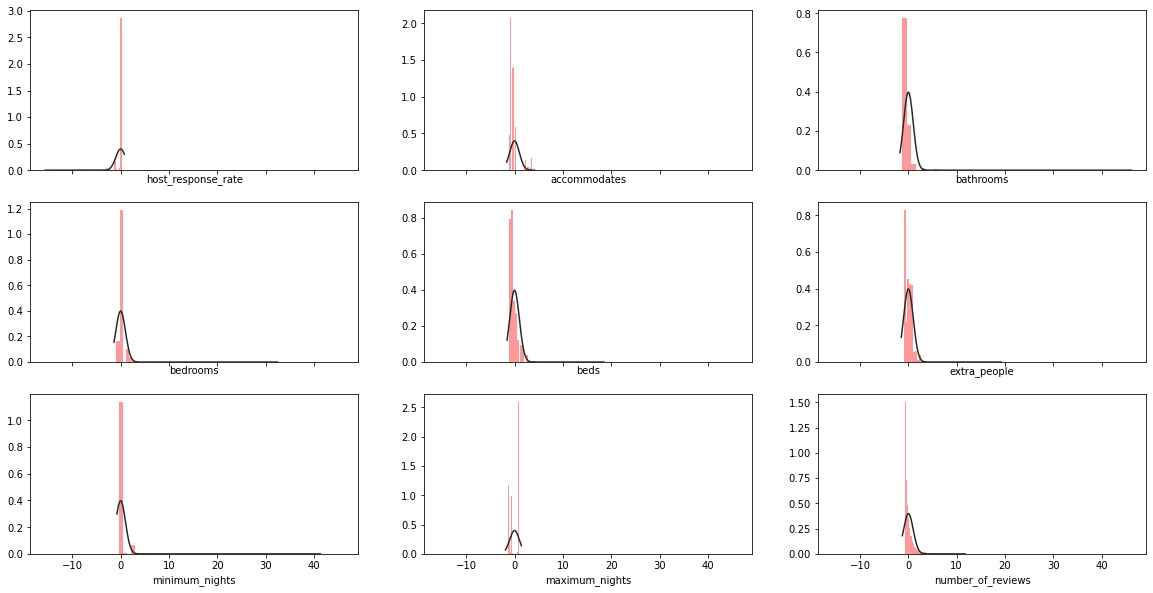

In [50]:
# melihat distribusi data setelah di standarized
f, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True)
a = 0
b = 0
for x in  numerical:
    sns.distplot(data_for_price[x], fit = norm, label="normal distribution", kde=False, color="r", ax=axes[a, b])
    b+=1
    if b>2:
        b=0
        a+=1

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_for_price.loc[:,:'number_of_reviews'],data_for_price[['price']],test_size = 0.2, shuffle = True, random_state = 10)

In [52]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 3025 to 6347
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1710 non-null   int32
dtypes: int32(1)
memory usage: 20.0 KB


In [53]:
data_train = x_train

In [54]:
count_category = pd.value_counts(y_train['price'],sort = True)
print(count_category)

0    3504
1    3336
Name: price, dtype: int64


## Feature Selection

### Mencari Spearman correlation coefficient untuk numerical data
Memilih data yang hasil p-value ny lebih kecil dari 0.05 dan koefisien spearman lebih besar dari 0.05 dan lebih kecil dari -0.05 dimana kalau koefisien korelasi ny semakin positif artinya data target akan sebanding dengan fitur sementara jika semakin negatif koefisien korelasinya maka akan berbanding terbalik dengan data target. Sementara itu p - value dipakai untuk mengindikasi kan bahwa peluang untuk mendapatkan hasil yang setidaknya sama ekstrim dengan variabel yang diamati. Jika p value makin kecil maka mengindikasikan bahwa nilai ekstrim tersebut dapat muncul tetapi kemungkinan ny kecil. 

In [55]:
from scipy import stats

In [56]:
numerical_selected = []

print("Data numerical yang akan dipilih menjadi fitur:")
print("===============================================")
for i,x in enumerate(numerical):
    coeff , p_val = stats.spearmanr(x_train[x],y_train)
    if (coeff >= 0.05 or coeff <= -0.05) and (p_val<=0.05):
        print(x)
        numerical_selected.append(x)

Data numerical yang akan dipilih menjadi fitur:
accommodates
bathrooms
bedrooms
beds
extra_people
minimum_nights


### Melakukan chi-square test untuk categorical data

Test ini cocok untuk data kategori karena dihitung berdasarkan frekuensi nya.

Memilih data yang hasil p-value ny lebih kecil dari 0.05. p - value dipakai untuk mengindikasi kan bahwa peluang untuk mendapatkan hasil yang setidaknya sama ekstrim dengan variabel yang diamati. Jika p value makin kecil maka mengindikasikan bahwa nilai ekstrim tersebut dapat muncul tetapi kemungkinan ny kecil. 

In [57]:
from sklearn.feature_selection import chi2

chi2,p_val = chi2(x_train[categorical],y_train)

In [58]:
p_val

array([6.39181724e-02, 8.13481439e-01, 4.20547476e-14])

In [59]:
chi2

array([3.43268327e+00, 5.56663398e-02, 5.70701171e+01])

In [60]:
list_of_index = []
for i,x in enumerate(p_val):
    if x<=0.05:
        list_of_index.append(i)

In [61]:
categorical_selected = []

print("Data categorical yang akan dipilih menjadi fitur:")
print("===============================================")
for i,x in enumerate(categorical):
    if i in list_of_index:
        print(x)
        categorical_selected.append(x)

Data categorical yang akan dipilih menjadi fitur:
property_type


In [62]:
selected_features = []
for x in numerical_selected:
    selected_features.append(x)

for x in categorical_selected:
    selected_features.append(x)

In [63]:
selected_features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'property_type']

In [64]:
x_train = x_train[selected_features]
x_test = x_test[selected_features]

### One Hot Encode categorical data

Melakukan one hot encoding karena category yang di label encode tidak menampilkan tingkatan sehingga harus di one hot encode.

In [65]:
x_train

,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,property_type
7541,0.457419,-0.301514,-0.231654,0.477061,-0.001097,-0.264767,1
4691,-0.797896,-0.301514,-0.889675,-0.285916,-0.985562,-0.264767,1
5364,-0.484067,-0.301514,-0.231654,-0.285916,0.327058,-0.151873,1
295,-0.170238,-0.301514,-0.231654,-0.285916,-0.281341,-0.151873,1
6393,-0.484067,-0.301514,-0.231654,-0.285916,-0.591776,0.186811,1
...,...,...,...,...,...,...,...
4829,-0.797896,-0.301514,-0.231654,-0.285916,1.639677,-0.151873,0
7291,1.085077,-0.301514,0.426367,0.858550,0.140666,-0.151873,1
1344,-0.484067,-0.301514,-0.231654,-0.285916,0.589582,-0.264767,12
7293,0.771248,-0.301514,0.426367,0.095573,1.311522,-0.038978,3


In [66]:
x_test

,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,property_type
3025,-0.797896,-0.301514,-0.231654,-0.667404,-0.985562,-0.151873,1
6154,-0.797896,0.635749,-0.231654,-0.285916,-0.985562,-0.264767,7
2169,0.771248,-0.301514,-0.231654,-0.285916,-0.001097,-0.151873,17
3560,0.771248,-0.301514,0.426367,0.858550,2.295987,-0.151873,1
2969,-0.797896,-0.301514,-0.231654,-0.667404,-0.985562,-0.151873,1
...,...,...,...,...,...,...,...
7371,0.457419,-0.301514,0.426367,-0.285916,0.983368,-0.264767,1
2282,-0.170238,-0.301514,-0.231654,-0.285916,0.983368,-0.264767,19
7178,-0.797896,-0.301514,-0.231654,-1.048893,-0.985562,-0.264767,1
3444,-0.797896,-0.301514,-0.231654,-0.667404,-0.985562,-0.264767,1


In [67]:
frames = [x_train,x_test]

train_test_union =  pd.concat(frames)

In [68]:
train_test_union

,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,property_type
7541,0.457419,-0.301514,-0.231654,0.477061,-0.001097,-0.264767,1
4691,-0.797896,-0.301514,-0.889675,-0.285916,-0.985562,-0.264767,1
5364,-0.484067,-0.301514,-0.231654,-0.285916,0.327058,-0.151873,1
295,-0.170238,-0.301514,-0.231654,-0.285916,-0.281341,-0.151873,1
6393,-0.484067,-0.301514,-0.231654,-0.285916,-0.591776,0.186811,1
...,...,...,...,...,...,...,...
7371,0.457419,-0.301514,0.426367,-0.285916,0.983368,-0.264767,1
2282,-0.170238,-0.301514,-0.231654,-0.285916,0.983368,-0.264767,19
7178,-0.797896,-0.301514,-0.231654,-1.048893,-0.985562,-0.264767,1
3444,-0.797896,-0.301514,-0.231654,-0.667404,-0.985562,-0.264767,1


Gabung new_x_train dan x_test karena selanjutnya data categorical akan di one hot encoding

In [69]:
one_hot = preprocessing.OneHotEncoder(sparse = False)

# train data
for x in categorical_selected:
    res = one_hot.fit_transform(train_test_union[[x]]).astype(int)
    for i in range(res.shape[1]):
        column_name = x + str(i)
        train_test_union.insert(len(train_test_union.columns), column_name, res.T[i])
    train_test_union.drop(x, axis = 1,inplace = True)

slice data yang digabung ke x_train dan x_test

In [70]:
x_train = train_test_union.iloc[0:x_train.shape[0],:]
x_train.reset_index(drop = True,inplace = True)
x_test = train_test_union.iloc[x_train.shape[0]:,:]
x_test.reset_index(drop=True,inplace = True)

## Buat model Logistic regression untuk klasifikasi

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train,y_train)
res = model.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('Akurasi Logistic Regression : {} %'.format(accuracy_score(y_test,res)*100))

Akurasi Logistic Regression : 72.69005847953215 %


Saya memilih metrics akurasi sebagai metrics untuk mengevaluasi model karena dari akurasi kita bisa mengetahui rate hasil prediksi sama dengan data test. Feature enginnering dan feature selection berpengaruh karena ketika feature engineering data di scale menjadi satuan standat deviasi sehingga memiliki scale yang sama dan akan meningkatkan perform adari logistic regression. Sayang nya akurasi ny masih cukup rendah karena dimensi data yang besar. Dimensi data yang besar ini dikarenakan one hot encoding, dimana one hot encoding harus kita lakukan karena jika kita hanya menggunakan label encoder model logistic regression akan salah mengartikan angka-angka label sebagai tingakatan.